In [281]:
import numpy as np
import pandas as pd
from tqdm import tqdm

from backtesterClass.orderClass import orders
from backtesterClass.orderBookClass import OBData
from backtesterClass.analysisClass import analysisClass


from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso

from scipy.stats import pearsonr, spearmanr

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline

In [173]:
data = pd.read_csv(r'/Users/leo/Downloads/BTCUSD_241227-bookTicker-2024-09-01.csv', sep=",")
data["price"] = (data["best_bid_price"]+data["best_ask_price"])/2
data.head()

,update_id,best_bid_price,best_bid_qty,best_ask_price,best_ask_qty,transaction_time,event_time,price
0,1022033143275,60352.2,61.0,60358.5,7.0,1725148803813,1725148803823,60355.35
1,1022033143540,60352.2,60.0,60358.5,7.0,1725148803820,1725148803827,60355.35
2,1022033143684,60352.3,1.0,60358.5,7.0,1725148803822,1725148803830,60355.40
3,1022033146373,60352.3,1.0,60358.4,95.0,1725148803903,1725148803912,60355.35
4,1022033146703,60352.3,1.0,60352.4,6.0,1725148803910,1725148803918,60352.35


In [174]:
df = data[["event_time", "price"]]
df.head()

,event_time,price
0,1725148803823,60355.35
1,1725148803827,60355.35
2,1725148803830,60355.40
3,1725148803912,60355.35
4,1725148803918,60352.35


In [175]:
df["event_time"] = pd.to_datetime(df["event_time"], unit='ms')
df

/var/folders/kq/gv1893yd2m5gzbgmbdnxvnnc0000gn/T/ipykernel_46012/1610313133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["event_time"] = pd.to_datetime(df["event_time"], unit='ms')


,event_time,price
0,2024-09-01 00:00:03.823,60355.35
1,2024-09-01 00:00:03.827,60355.35
2,2024-09-01 00:00:03.830,60355.40
3,2024-09-01 00:00:03.912,60355.35
4,2024-09-01 00:00:03.918,60352.35
...,...,...
654354,2024-09-01 23:59:59.559,58573.50
654355,2024-09-01 23:59:59.559,58573.50
654356,2024-09-01 23:59:59.559,58573.55
654357,2024-09-01 23:59:59.771,58573.50


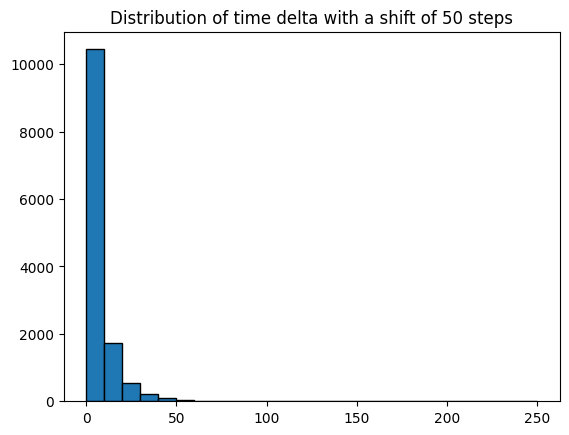


 Mean seconds of time delta for shift of 50 steps : 6.601644 
 Median seconds of time delta for shift of 50 steps : 3.548


In [176]:
shift = 50

plt.hist(df["event_time"].diff(shift).iloc[::shift].dt.total_seconds(), bins=np.arange(0,260, 10), ec="k")
plt.title(f"Distribution of time delta with a shift of {shift} steps")
plt.show()

print(f'\n Mean seconds of time delta for shift of {shift} steps : {df["event_time"].diff(shift).iloc[::shift].mean().total_seconds()} \n' , 
      f'Median seconds of time delta for shift of {shift} steps : {df["event_time"].diff(shift).iloc[::shift].median().total_seconds()}')

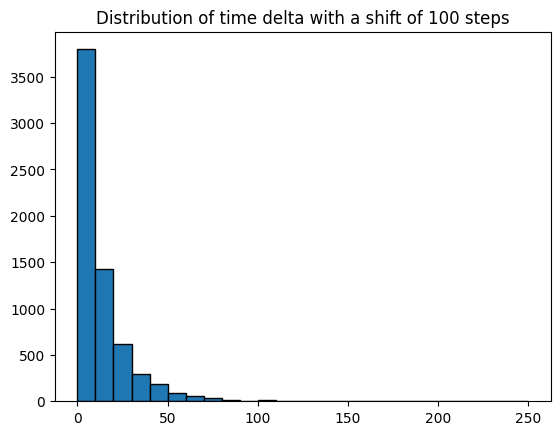


 Mean seconds of time delta for shift of 100 steps : 13.202563 
 Median seconds of time delta for shift of 100 steps : 8.054


In [177]:
shift = 100

plt.hist(df["event_time"].diff(shift).iloc[::shift].dt.total_seconds(), bins=np.arange(0,260, 10), ec="k")
plt.title(f"Distribution of time delta with a shift of {shift} steps")
plt.show()

print(f'\n Mean seconds of time delta for shift of {shift} steps : {df["event_time"].diff(shift).iloc[::shift].mean().total_seconds()} \n' , 
      f'Median seconds of time delta for shift of {shift} steps : {df["event_time"].diff(shift).iloc[::shift].median().total_seconds()}')

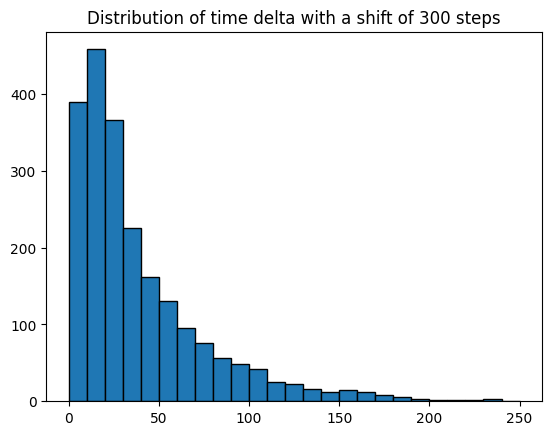


 Mean seconds of time delta for shift of 300 steps : 39.607691 
 Median seconds of time delta for shift of 300 steps : 26.674


In [178]:
shift = 300

plt.hist(df["event_time"].diff(shift).iloc[::shift].dt.total_seconds(), bins=np.arange(0,260, 10), ec="k")
plt.title(f"Distribution of time delta with a shift of {shift} steps")
plt.show()

print(f'\n Mean seconds of time delta for shift of {shift} steps : {df["event_time"].diff(shift).iloc[::shift].mean().total_seconds()} \n' , 
      f'Median seconds of time delta for shift of {shift} steps : {df["event_time"].diff(shift).iloc[::shift].median().total_seconds()}')

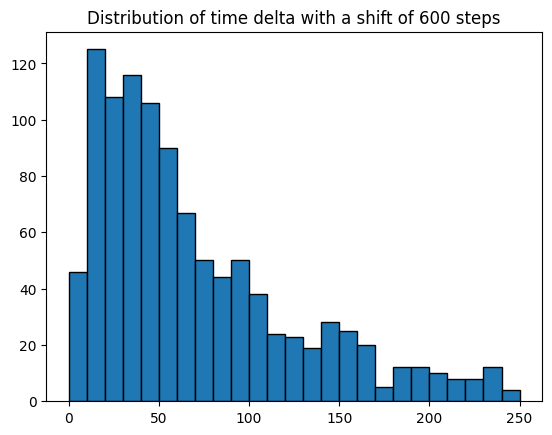


 Mean seconds of time delta for shift of 600 steps : 79.206967 
 Median seconds of time delta for shift of 600 steps : 54.5225


In [179]:
shift = 600

plt.hist(df["event_time"].diff(shift).iloc[::shift].dt.total_seconds(), bins=np.arange(0,260, 10), ec="k")
plt.title(f"Distribution of time delta with a shift of {shift} steps")
plt.show()

print(f'\n Mean seconds of time delta for shift of {shift} steps : {df["event_time"].diff(shift).iloc[::shift].mean().total_seconds()} \n' , 
      f'Median seconds of time delta for shift of {shift} steps : {df["event_time"].diff(shift).iloc[::shift].median().total_seconds()}')

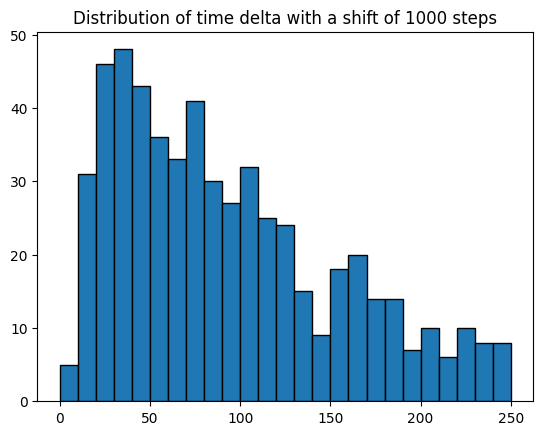


 Mean seconds of time delta for shift of 1000 steps : 132.011613 
 Median seconds of time delta for shift of 1000 steps : 96.1405


In [180]:
shift = 1000

plt.hist(df["event_time"].diff(shift).iloc[::shift].dt.total_seconds(), bins=np.arange(0,260, 10), ec="k")
plt.title(f"Distribution of time delta with a shift of {shift} steps")
plt.show()

print(f'\n Mean seconds of time delta for shift of {shift} steps : {df["event_time"].diff(shift).iloc[::shift].mean().total_seconds()} \n' , 
      f'Median seconds of time delta for shift of {shift} steps : {df["event_time"].diff(shift).iloc[::shift].median().total_seconds()}')

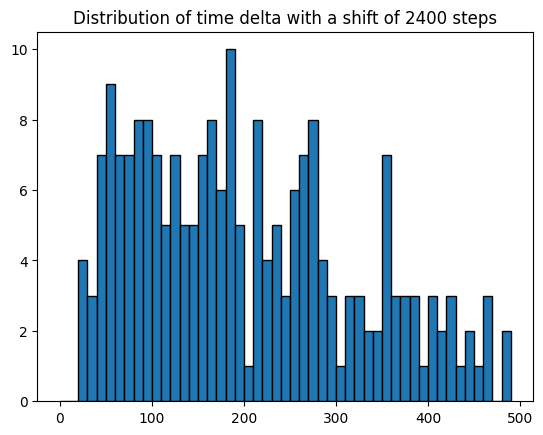


 Mean seconds of time delta for shift of 2400 steps : 316.761183 
 Median seconds of time delta for shift of 2400 steps : 241.264


In [181]:
shift = 2400

plt.hist(df["event_time"].diff(shift).iloc[::shift].dt.total_seconds(), bins=np.arange(0,500, 10), ec="k")
plt.title(f"Distribution of time delta with a shift of {shift} steps")
plt.show()

print(f'\n Mean seconds of time delta for shift of {shift} steps : {df["event_time"].diff(shift).iloc[::shift].mean().total_seconds()} \n' , 
      f'Median seconds of time delta for shift of {shift} steps : {df["event_time"].diff(shift).iloc[::shift].median().total_seconds()}')


In [182]:
q = 0.0001

### Lagged Returns

In [183]:
lags = [50, 100, 300, 600, 1000, 2400]

for lag in lags:
    df[f'return_{lag}t'] = (df.price
                                .pct_change(lag)
                                .pipe(lambda x: x.clip(lower=x.quantile(q),
                                                       upper=x.quantile(1 - q)))
                                )
df

/var/folders/kq/gv1893yd2m5gzbgmbdnxvnnc0000gn/T/ipykernel_46012/2272644367.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'return_{lag}t'] = (df.price
/var/folders/kq/gv1893yd2m5gzbgmbdnxvnnc0000gn/T/ipykernel_46012/2272644367.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'return_{lag}t'] = (df.price
/var/folders/kq/gv1893yd2m5gzbgmbdnxvnnc0000gn/T/ipykernel_46012/2272644367.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

,event_time,price,return_50t,return_100t,return_300t,return_600t,return_1000t,return_2400t
0,2024-09-01 00:00:03.823,60355.35,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-09-01 00:00:03.827,60355.35,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-09-01 00:00:03.830,60355.40,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-09-01 00:00:03.912,60355.35,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-09-01 00:00:03.918,60352.35,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
654354,2024-09-01 23:59:59.559,58573.50,-0.000182,-0.000291,-0.000552,-0.000680,-0.000595,-0.000283
654355,2024-09-01 23:59:59.559,58573.50,-0.000182,-0.000257,-0.000551,-0.000734,-0.000596,-0.000286
654356,2024-09-01 23:59:59.559,58573.55,-0.000181,-0.000256,-0.000532,-0.000690,-0.000596,-0.000286
654357,2024-09-01 23:59:59.771,58573.50,-0.000182,-0.000257,-0.000518,-0.000692,-0.000545,-0.000286


### Shift lagged returns

In [184]:
[50, 100, 300, 600, 1000, 2400]

for t in [1, 2]:
    for lag in lags:
        df[f'return_{lag}t_lag{t}'] = (df[f'return_{lag}t'].shift(t * lag))

### Compute Forward Returns

In [185]:
for t in lags:
    df[f'target_{t}t'] = df[f'return_{t}t'].shift(-t)

In [186]:
df

,event_time,price,return_50t,return_100t,return_300t,return_600t,return_1000t,return_2400t,return_50t_lag1,return_100t_lag1,...,return_300t_lag2,return_600t_lag2,return_1000t_lag2,return_2400t_lag2,target_50t,target_100t,target_300t,target_600t,target_1000t,target_2400t
0,2024-09-01 00:00:03.823,60355.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000053,-0.000225,-0.000063,0.001238,0.001381,-0.000456
1,2024-09-01 00:00:03.827,60355.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000054,-0.000225,-0.000066,0.001238,0.001381,-0.000517
2,2024-09-01 00:00:03.830,60355.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000053,-0.000227,-0.000068,0.001237,0.001403,-0.000519
3,2024-09-01 00:00:03.912,60355.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000055,-0.000227,-0.000066,0.001238,0.001403,-0.000517
4,2024-09-01 00:00:03.918,60352.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000106,-0.000176,-0.000014,0.001287,0.001454,-0.000467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654354,2024-09-01 23:59:59.559,58573.50,-0.000182,-0.000291,-0.000552,-0.000680,-0.000595,-0.000283,-0.000109,-0.000048,...,-0.000061,0.000025,-0.001370,-0.001158,NaN,NaN,NaN,NaN,NaN,NaN
654355,2024-09-01 23:59:59.559,58573.50,-0.000182,-0.000257,-0.000551,-0.000734,-0.000596,-0.000286,-0.000075,-0.000123,...,-0.000007,0.000041,-0.001370,-0.001103,NaN,NaN,NaN,NaN,NaN,NaN
654356,2024-09-01 23:59:59.559,58573.55,-0.000181,-0.000256,-0.000532,-0.000690,-0.000596,-0.000286,-0.000075,-0.000123,...,-0.000050,0.000042,-0.001371,-0.001103,NaN,NaN,NaN,NaN,NaN,NaN
654357,2024-09-01 23:59:59.771,58573.50,-0.000182,-0.000257,-0.000518,-0.000692,-0.000545,-0.000286,-0.000075,-0.000164,...,-0.000103,0.000087,-0.001371,-0.001026,NaN,NaN,NaN,NaN,NaN,NaN


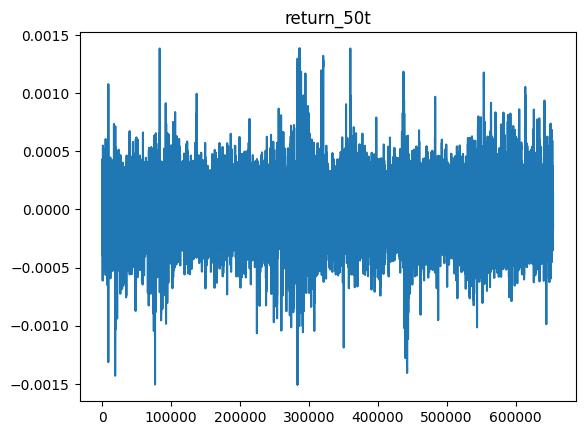

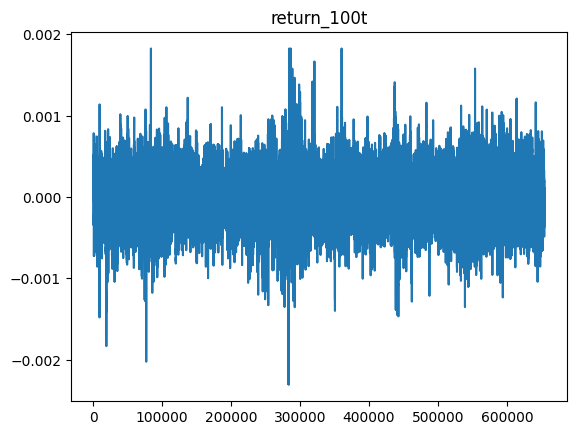

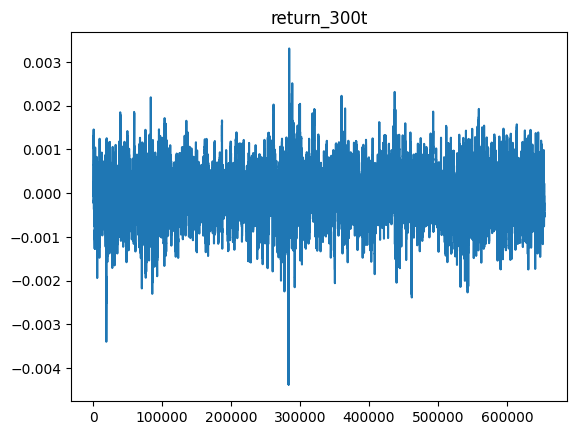

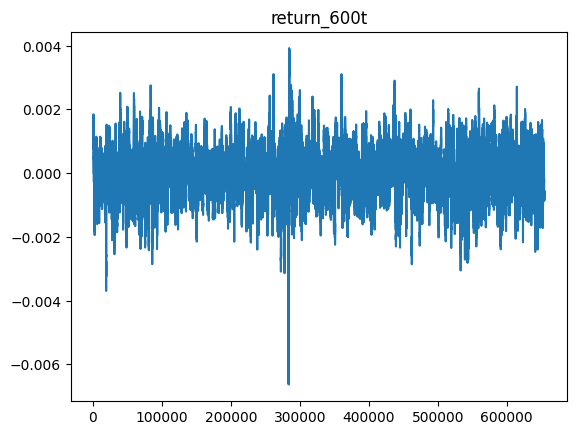

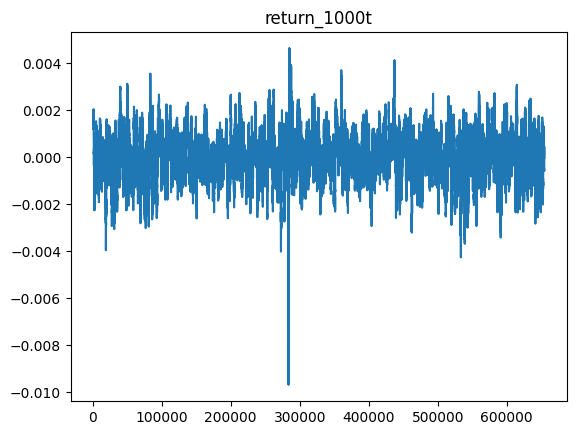

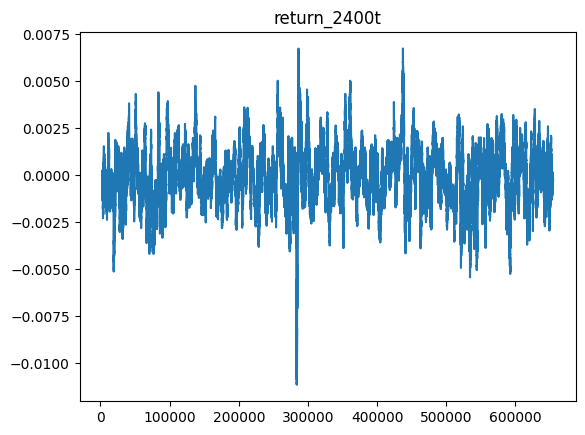

In [187]:
for lag in lags:
    plt.plot(df[f"return_{lag}t"])
    plt.title(f"return_{lag}t")
    plt.show()

In [271]:
df = df.dropna().reset_index(drop=True)
y = df.filter(like='target')
X = df.drop(y.columns, axis=1)


### Custom MultipleTimeSeriesCV

In [272]:
class MultipleTimeSeriesCV:
    """Generates tuples of train_idx, test_idx pairs
    Assumes the MultiIndex contains levels 'symbol' and 'date'
    purges overlapping outcomes"""

    def __init__(self,
                 X,
                 n_splits=2,
                 lookahead=None,
                 train_period_length=None,
                 test_period_length=None,
                 shuffle=False):
        
        self.X_length = len(X)
        self.n_splits = n_splits
        self.lookahead = lookahead

        if (test_period_length == None) and (train_period_length == None):
            self.test_length = int(0.3 * self.X_length//self.n_splits)
            self.train_length = int(0.7 * self.X_length//self.n_splits - 2*self.lookahead)
            # print(f"test_length: {self.test_length}, train_length :{self.train_length}")
            
        else:
            self.test_length = test_period_length
            self.train_length = train_period_length
        self.shuffle = shuffle

    def split(self, X, y=None, groups=None):
        # unique_dates = X["event_time"].unique()
        dates = X["event_time"]
        days = sorted(dates, reverse=True)
        train_start_idx = -self.lookahead
        split_idx = []

        for i in range(self.n_splits):
            # print(f"i: {i}, split: {self.n_splits}")
            test_end_idx = train_start_idx + self.lookahead
            test_start_idx = test_end_idx + self.test_length
            train_end_idx = test_start_idx + self.lookahead - 1
            train_start_idx = train_end_idx + self.train_length  - 1
            # print(f"test_end_idx: {test_end_idx}, test_start_idx :{test_start_idx},train_end_idx : {train_end_idx},train_start_idx : {train_start_idx}")
            
            
            split_idx.append([train_start_idx, train_end_idx,
                              test_start_idx, test_end_idx])

        dates = X.reset_index()[['event_time']]

        for train_start, train_end, test_start, test_end in split_idx[::-1]:
            # print("train_start", train_start)
            train_idx = dates[(dates.event_time >= days[train_start])
                              & (dates.event_time <= days[train_end])].index

            # print(f"train_index: {train_idx[0],train_idx[-1]}")
            test_idx = dates[(dates.event_time > days[test_start])
                             & (dates.event_time <= days[test_end])].index
            # print(f"test_index: {test_idx[0], test_idx[-1]}")
            if self.shuffle:
                np.random.shuffle(list(train_idx))
            yield train_idx, test_idx

In [273]:
n_splits = 2
lookahead = 1000

cv = MultipleTimeSeriesCV(n_splits=n_splits,
                          lookahead=lookahead,
                          X = df)

In [274]:
i = 0
for train_idx, test_idx in cv.split(X=data):
    train = data.iloc[train_idx]
    train_dates = pd.to_datetime(train['event_time'], unit="ms")
    test = data.iloc[test_idx]
    test_dates = pd.to_datetime(test["event_time"], unit="ms")
    df_ = pd.concat([train.reset_index(),test.reset_index()])
    n = len(df_)
    assert n== len(df_.drop_duplicates())
    print(len(train),
          train_dates.min(), train_dates.max(),
          len(test),
          test_dates.min(), test_dates.max())
    i += 1

223665 2024-09-01 01:20:35.725000 2024-09-01 12:55:03.049000 96713 2024-09-01 13:01:56.429000 2024-09-01 14:50:43.693000
223670 2024-09-01 14:51:54.565000 2024-09-01 22:32:19.902000 96713 2024-09-01 22:32:37.595000 2024-09-01 23:59:59.781000


### Run cross-validation with LinearRegression 

In [ ]:
%%time
target = f'target_{lookahead}t'
lr_predictions, lr_scores = [], []
lr = LinearRegression()
for i, (train_idx, test_idx) in enumerate(cv.split(X.dropna()), 1):
    X_ = X.drop(["event_time"], axis=1)
    # print(f"X : {len(X_)}, y: {len(y)}, train_idx: {train_idx[-1]}, test_idx: {test_idx[-1]}")
    X_train, y_train, = X_.iloc[train_idx], y[target].iloc[train_idx]
    X_test, y_test = X_.iloc[test_idx], y[target].iloc[test_idx]
    lr.fit(X=X_train, y=y_train)
    y_pred = lr.predict(X_test)

    preds = y_test.to_frame('actuals').assign(predicted=y_pred)
    
    # preds_by_day = preds.groupby(level='date')
    # scores = pd.concat([preds_by_day.apply(lambda x: spearmanr(x.predicted,
    #                                                            x.actuals)[0] * 100)
    #                     .to_frame('ic'),
    #                     preds_by_day.apply(lambda x: np.sqrt(mean_squared_error(y_pred=x.predicted,
    #                                                                             y_true=x.actuals)))
    #                     .to_frame('rmse')], axis=1)

    scores = pd.DataFrame({
        "IC": [spearmanr(preds.predicted, preds.actuals)[0] * 100],
        "RMSE": [np.sqrt(mean_squared_error(y_pred=preds.predicted, y_true=preds.actuals))]
    })

    lr_scores.append(scores)
    lr_predictions.append(preds)


lr_scores = pd.concat(lr_scores)
lr_predictions = pd.concat(lr_predictions)

CPU times: user 2.86 s, sys: 1.05 s, total: 3.91 s
Wall time: 3.17 s


In [276]:
lr_scores

,Spearman,RMSE
0,10.226211,0.003213
0,5.638906,0.001048


In [285]:
def plot_preds_scatter(df, ticker=None):
    if ticker is not None:
        idx = pd.IndexSlice
        df = df.loc[ticker]
    j = sns.jointplot(x='predicted', y='actuals',
                      robust=True, ci=None,
                      line_kws={'lw': 1, 'color': 'k'},
                      scatter_kws={'s': 1},
                      data=df,
                      kind='reg')
    j.ax_joint.yaxis.set_major_formatter(
        FuncFormatter(lambda y, _: '{:.1%}'.format(y)))
    j.ax_joint.xaxis.set_major_formatter(
        FuncFormatter(lambda x, _: '{:.1%}'.format(x)))
    j.ax_joint.set_xlabel('Predicted')
    j.ax_joint.set_ylabel('Actuals')

In [282]:
def plot_ic_distribution(df, ax=None):
    if ax is not None:
        sns.distplot(df.ic, ax=ax)
    else:
        ax = sns.distplot(df.ic)
    mean, median = df.ic.mean(), df.ic.median()
    ax.axvline(0, lw=1, ls='--', c='k')
    ax.text(x=.05, y=.9,
            s=f'Mean: {mean:8.2f}\nMedian: {median:5.2f}',
            horizontalalignment='left',
            verticalalignment='center',
            transform=ax.transAxes)
    ax.set_xlabel('Information Coefficient')
    sns.despine()
    plt.tight_layout()

In [283]:
def plot_rolling_ic(df):
    fig, axes = plt.subplots(nrows=2, sharex=True)
    rolling_result = df.sort_index().rolling(21).mean().dropna()
    mean_ic = df.ic.mean()
    rolling_result.ic.plot(ax=axes[0],
                           title=f'Information Coefficient (Mean: {mean_ic:.2f})',
                           lw=1)
    axes[0].axhline(0, lw=.5, ls='-', color='k')
    axes[0].axhline(mean_ic, lw=1, ls='--', color='k')

    mean_rmse = df.rmse.mean()
    rolling_result.rmse.plot(ax=axes[1],
                             title=f'Root Mean Squared Error (Mean: {mean_rmse:.2%})',
                             lw=1,
                             ylim=(0, df.rmse.max()))
    axes[1].axhline(df.rmse.mean(), lw=1, ls='--', color='k')
    sns.despine()
    plt.tight_layout()

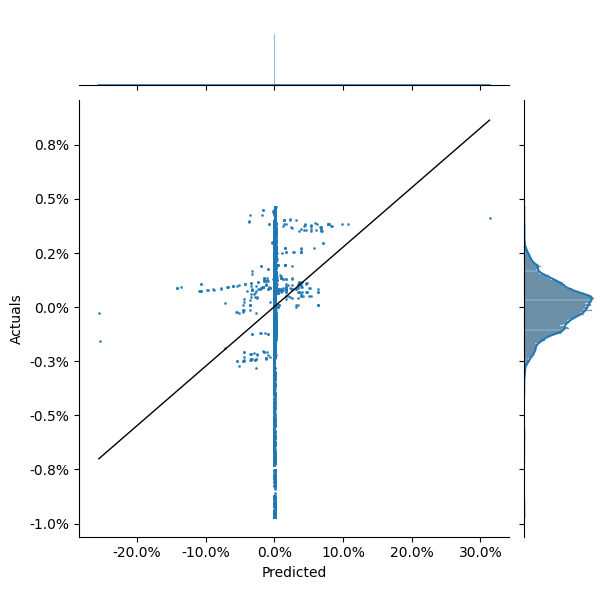

In [286]:
plt.ioff()
plot_preds_scatter(lr_predictions)
plt.show()

In [211]:
preds

,actuals,predicted
229030,0.000702,0.000528
229031,0.000748,0.000546
229032,0.000770,0.000535
229033,0.000724,0.000516
229034,0.000725,0.000505
...,...,...
327178,0.000578,-0.000248
327179,0.000579,-0.000249
327180,0.000580,-0.000250
327181,0.000581,-0.000249


In [193]:
df

,event_time,price,return_50t,return_100t,return_300t,return_600t,return_1000t,return_2400t,return_50t_lag1,return_100t_lag1,...,return_300t_lag2,return_600t_lag2,return_1000t_lag2,return_2400t_lag2,target_50t,target_100t,target_300t,target_600t,target_1000t,target_2400t
0,2024-09-01 00:00:03.823,60355.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000053,-0.000225,-0.000063,0.001238,0.001381,-0.000456
1,2024-09-01 00:00:03.827,60355.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000054,-0.000225,-0.000066,0.001238,0.001381,-0.000517
2,2024-09-01 00:00:03.830,60355.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000053,-0.000227,-0.000068,0.001237,0.001403,-0.000519
3,2024-09-01 00:00:03.912,60355.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000055,-0.000227,-0.000066,0.001238,0.001403,-0.000517
4,2024-09-01 00:00:03.918,60352.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000106,-0.000176,-0.000014,0.001287,0.001454,-0.000467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654354,2024-09-01 23:59:59.559,58573.50,-0.000182,-0.000291,-0.000552,-0.000680,-0.000595,-0.000283,-0.000109,-0.000048,...,-0.000061,0.000025,-0.001370,-0.001158,NaN,NaN,NaN,NaN,NaN,NaN
654355,2024-09-01 23:59:59.559,58573.50,-0.000182,-0.000257,-0.000551,-0.000734,-0.000596,-0.000286,-0.000075,-0.000123,...,-0.000007,0.000041,-0.001370,-0.001103,NaN,NaN,NaN,NaN,NaN,NaN
654356,2024-09-01 23:59:59.559,58573.55,-0.000181,-0.000256,-0.000532,-0.000690,-0.000596,-0.000286,-0.000075,-0.000123,...,-0.000050,0.000042,-0.001371,-0.001103,NaN,NaN,NaN,NaN,NaN,NaN
654357,2024-09-01 23:59:59.771,58573.50,-0.000182,-0.000257,-0.000518,-0.000692,-0.000545,-0.000286,-0.000075,-0.000164,...,-0.000103,0.000087,-0.001371,-0.001026,NaN,NaN,NaN,NaN,NaN,NaN
